In [0]:
from google.colab import drive
drive.mount("/genome_data")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /genome_data


In [0]:
pwd

'/content'

In [0]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime
from sklearn.model_selection import train_test_split
import os

print("tensorflow version : ", tf.__version__)
print("tensorflow_hub version : ", hub.__version__)

tensorflow version :  1.15.0
tensorflow_hub version :  0.7.0


In [0]:
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 5.2MB/s 


In [0]:
#Importing BERT modules
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization

In [0]:
# Set the output directory for saving model file
OUTPUT_DIR = '/genome_data/My Drive/Colab Notebooks/BERT/genome_data'

#@markdown Whether or not to clear/delete the directory and create a new one
DO_DELETE = False #@param {type:"boolean"}

if DO_DELETE:
  try:
    tf.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    pass

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: /genome_data/My Drive/Colab Notebooks/BERT/genome_data *****


In [0]:
train = pd.read_csv("/genome_data/My Drive/Colab Notebooks/BERT/genome_data/train.csv", delimiter="\t", header=None)
test = pd.read_csv("/genome_data/My Drive/Colab Notebooks/BERT/genome_data/dev.csv", delimiter="\t", header=None)

from sklearn.model_selection import train_test_split

train, val =  train_test_split(train, test_size = 0.2, random_state = 100)

In [0]:
val[0][914]


'T C A G A T A A G G T T A A A G G T C C G T A C G T A A C A A T T G A A T A T A G C T C A G T G A C G T C G C T C T G T T A G A G T G T A C A G A T G G G C T A A T T C G A C G T T T A T C T T A T A C T C T C C G A A G C G G A A T A C G T T G A A A G T G T C A C G C A G A C G C A C G G C G T C A G T T C C A G C G A A G T A A T T G C A A A T C G T G A A A T G A T A C C C G G G A C A C T C T A A A G'

In [0]:
print("Training Set Shape :", train.shape)
print("Validation Set Shape :", val.shape)
print("Test Set Shape :", test.shape)

Training Set Shape : (5120, 2)
Validation Set Shape : (1280, 2)
Test Set Shape : (1600, 2)


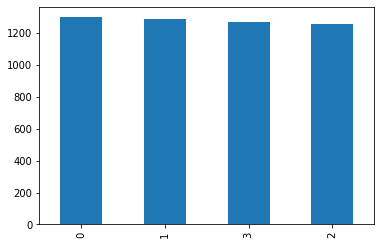

In [0]:
train[1].value_counts().plot(kind = 'bar')

In [0]:
DATA_COLUMN = 0
LABEL_COLUMN = 1
# The list containing all the classes (train['SECTION'].unique())
label_list = [0, 1, 2, 3]

In [0]:
train_InputExamples = train.apply(lambda x: bert.run_classifier.InputExample(guid=None,
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

val_InputExamples = val.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [0]:
val_InputExamples, val

(2693    <bert.run_classifier.InputExample object at 0x...
 5047    <bert.run_classifier.InputExample object at 0x...
 2988    <bert.run_classifier.InputExample object at 0x...
 1222    <bert.run_classifier.InputExample object at 0x...
 3642    <bert.run_classifier.InputExample object at 0x...
                               ...                        
 2920    <bert.run_classifier.InputExample object at 0x...
 5283    <bert.run_classifier.InputExample object at 0x...
 914     <bert.run_classifier.InputExample object at 0x...
 6133    <bert.run_classifier.InputExample object at 0x...
 2553    <bert.run_classifier.InputExample object at 0x...
 Length: 1280, dtype: object,
                                                       0  1
 2693  T C G T G T G A T A C G G T T T T C C A C C T ...  1
 5047  G G C T A T C T C C A C G C G A T A A G G T A ...  3
 2988  T G C T A C C C A T A G G C C A C T C A T C G ...  0
 1222  T C C A C C A A C C A C G C A A T A G T T T T ...  1
 3642  A T A A A A C 

In [0]:
train_InputExamples

2558    <bert.run_classifier.InputExample object at 0x...
5044    <bert.run_classifier.InputExample object at 0x...
2569    <bert.run_classifier.InputExample object at 0x...
3414    <bert.run_classifier.InputExample object at 0x...
2675    <bert.run_classifier.InputExample object at 0x...
                              ...                        
6026    <bert.run_classifier.InputExample object at 0x...
79      <bert.run_classifier.InputExample object at 0x...
3927    <bert.run_classifier.InputExample object at 0x...
5955    <bert.run_classifier.InputExample object at 0x...
5640    <bert.run_classifier.InputExample object at 0x...
Length: 5120, dtype: object

In [0]:

print("Row 0 - guid of training set : ", train_InputExamples.iloc[0].guid)
print("\n__________\nRow 0 - text_a of training set : ", train_InputExamples.iloc[0].text_a)
print("\n__________\nRow 0 - text_b of training set : ", train_InputExamples.iloc[0].text_b)
print("\n__________\nRow 0 - label of training set : ", train_InputExamples.iloc[0].label)

Row 0 - guid of training set :  None

__________
Row 0 - text_a of training set :  T C A A C C G C C T A C G G T T T C T T T A G T T T G T C C C A G A T C C T C T T A G A C A G G G A G G T G G C A T A C G G G T A C C A G C C A T G T A T A T C C T A C T A A C A T C C C T A C C T C C A T T C C A T T G G A A C A A T A G T G A T A C C G A T A A G A C G C G G G A G G G T A A G A T G A A A A G A C C A G A T A A G G G A G G G T T G A C G A A G T A C T T A T A A G C C A T C A A A C A C

__________
Row 0 - text_b of training set :  None

__________
Row 0 - label of training set :  1


In [0]:
# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [0]:
print(tokenizer.tokenize(train_InputExamples.iloc[0].text_a))

['t', 'c', 'a', 'a', 'c', 'c', 'g', 'c', 'c', 't', 'a', 'c', 'g', 'g', 't', 't', 't', 'c', 't', 't', 't', 'a', 'g', 't', 't', 't', 'g', 't', 'c', 'c', 'c', 'a', 'g', 'a', 't', 'c', 'c', 't', 'c', 't', 't', 'a', 'g', 'a', 'c', 'a', 'g', 'g', 'g', 'a', 'g', 'g', 't', 'g', 'g', 'c', 'a', 't', 'a', 'c', 'g', 'g', 'g', 't', 'a', 'c', 'c', 'a', 'g', 'c', 'c', 'a', 't', 'g', 't', 'a', 't', 'a', 't', 'c', 'c', 't', 'a', 'c', 't', 'a', 'a', 'c', 'a', 't', 'c', 'c', 'c', 't', 'a', 'c', 'c', 't', 'c', 'c', 'a', 't', 't', 'c', 'c', 'a', 't', 't', 'g', 'g', 'a', 'a', 'c', 'a', 'a', 't', 'a', 'g', 't', 'g', 'a', 't', 'a', 'c', 'c', 'g', 'a', 't', 'a', 'a', 'g', 'a', 'c', 'g', 'c', 'g', 'g', 'g', 'a', 'g', 'g', 'g', 't', 'a', 'a', 'g', 'a', 't', 'g', 'a', 'a', 'a', 'a', 'g', 'a', 'c', 'c', 'a', 'g', 'a', 't', 'a', 'a', 'g', 'g', 'g', 'a', 'g', 'g', 'g', 't', 't', 'g', 'a', 'c', 'g', 'a', 'a', 'g', 't', 'a', 'c', 't', 't', 'a', 't', 'a', 'a', 'g', 'c', 'c', 'a', 't', 'c', 'a', 'a', 'a', 'c', 'a', 'c']

In [0]:
# We'll set sequences to be at most 128 tokens long.
MAX_SEQ_LENGTH = 200

# Convert our train and validation features to InputFeatures that BERT understands.
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

val_features = bert.run_classifier.convert_examples_to_features(val_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

INFO:tensorflow:Writing example 0 of 5120


INFO:tensorflow:Writing example 0 of 5120


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] t c a a c c g c c t a c g g t t t c t t t a g t t t g t c c c a g a t c c t c t t a g a c a g g g a g g t g g c a t a c g g g t a c c a g c c a t g t a t a t c c t a c t a a c a t c c c t a c c t c c a t t c c a t t g g a a c a a t a g t g a t a c c g a t a a g a c g c g g g a g g g t a a g a t g a a a a g a c c a g a t a a g g g a g g g t t g a c g a a g t a c t t a t a a g c c a t c a a a c [SEP]


INFO:tensorflow:tokens: [CLS] t c a a c c g c c t a c g g t t t c t t t a g t t t g t c c c a g a t c c t c t t a g a c a g g g a g g t g g c a t a c g g g t a c c a g c c a t g t a t a t c c t a c t a a c a t c c c t a c c t c c a t t c c a t t g g a a c a a t a g t g a t a c c g a t a a g a c g c g g g a g g g t a a g a t g a a a a g a c c a g a t a a g g g a g g g t t g a c g a a g t a c t t a t a a g c c a t c a a a c [SEP]


INFO:tensorflow:input_ids: 101 1056 1039 1037 1037 1039 1039 1043 1039 1039 1056 1037 1039 1043 1043 1056 1056 1056 1039 1056 1056 1056 1037 1043 1056 1056 1056 1043 1056 1039 1039 1039 1037 1043 1037 1056 1039 1039 1056 1039 1056 1056 1037 1043 1037 1039 1037 1043 1043 1043 1037 1043 1043 1056 1043 1043 1039 1037 1056 1037 1039 1043 1043 1043 1056 1037 1039 1039 1037 1043 1039 1039 1037 1056 1043 1056 1037 1056 1037 1056 1039 1039 1056 1037 1039 1056 1037 1037 1039 1037 1056 1039 1039 1039 1056 1037 1039 1039 1056 1039 1039 1037 1056 1056 1039 1039 1037 1056 1056 1043 1043 1037 1037 1039 1037 1037 1056 1037 1043 1056 1043 1037 1056 1037 1039 1039 1043 1037 1056 1037 1037 1043 1037 1039 1043 1039 1043 1043 1043 1037 1043 1043 1043 1056 1037 1037 1043 1037 1056 1043 1037 1037 1037 1037 1043 1037 1039 1039 1037 1043 1037 1056 1037 1037 1043 1043 1043 1037 1043 1043 1043 1056 1056 1043 1037 1039 1043 1037 1037 1043 1056 1037 1039 1056 1056 1037 1056 1037 1037 1043 1039 1039 1037 1056 1039

INFO:tensorflow:input_ids: 101 1056 1039 1037 1037 1039 1039 1043 1039 1039 1056 1037 1039 1043 1043 1056 1056 1056 1039 1056 1056 1056 1037 1043 1056 1056 1056 1043 1056 1039 1039 1039 1037 1043 1037 1056 1039 1039 1056 1039 1056 1056 1037 1043 1037 1039 1037 1043 1043 1043 1037 1043 1043 1056 1043 1043 1039 1037 1056 1037 1039 1043 1043 1043 1056 1037 1039 1039 1037 1043 1039 1039 1037 1056 1043 1056 1037 1056 1037 1056 1039 1039 1056 1037 1039 1056 1037 1037 1039 1037 1056 1039 1039 1039 1056 1037 1039 1039 1056 1039 1039 1037 1056 1056 1039 1039 1037 1056 1056 1043 1043 1037 1037 1039 1037 1037 1056 1037 1043 1056 1043 1037 1056 1037 1039 1039 1043 1037 1056 1037 1037 1043 1037 1039 1043 1039 1043 1043 1043 1037 1043 1043 1043 1056 1037 1037 1043 1037 1056 1043 1037 1037 1037 1037 1043 1037 1039 1039 1037 1043 1037 1056 1037 1037 1043 1043 1043 1037 1043 1043 1043 1056 1056 1043 1037 1039 1043 1037 1037 1043 1056 1037 1039 1056 1056 1037 1056 1037 1037 1043 1039 1039 1037 1056 1039

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] g c g g t t t t g t t a t c t t a c a c t c t c a t a c t a c t a t c g a g g t a t a a c a a a t t g c c g g g a g c a c a t c c t a c t a t t a c a t c a a g t t t g g t t a t t c a g g t c t c a t t g t t g c c g t a t a g t c g c c t a g a t g c c a g g c t a a t g c a a c c g t c a a t t t g g c g g a a c t a c t a t g a t g c g a c c c c g a a g a a a t a c a g c a g g a g a t t c c c g [SEP]


INFO:tensorflow:tokens: [CLS] g c g g t t t t g t t a t c t t a c a c t c t c a t a c t a c t a t c g a g g t a t a a c a a a t t g c c g g g a g c a c a t c c t a c t a t t a c a t c a a g t t t g g t t a t t c a g g t c t c a t t g t t g c c g t a t a g t c g c c t a g a t g c c a g g c t a a t g c a a c c g t c a a t t t g g c g g a a c t a c t a t g a t g c g a c c c c g a a g a a a t a c a g c a g g a g a t t c c c g [SEP]


INFO:tensorflow:input_ids: 101 1043 1039 1043 1043 1056 1056 1056 1056 1043 1056 1056 1037 1056 1039 1056 1056 1037 1039 1037 1039 1056 1039 1056 1039 1037 1056 1037 1039 1056 1037 1039 1056 1037 1056 1039 1043 1037 1043 1043 1056 1037 1056 1037 1037 1039 1037 1037 1037 1056 1056 1043 1039 1039 1043 1043 1043 1037 1043 1039 1037 1039 1037 1056 1039 1039 1056 1037 1039 1056 1037 1056 1056 1037 1039 1037 1056 1039 1037 1037 1043 1056 1056 1056 1043 1043 1056 1056 1037 1056 1056 1039 1037 1043 1043 1056 1039 1056 1039 1037 1056 1056 1043 1056 1056 1043 1039 1039 1043 1056 1037 1056 1037 1043 1056 1039 1043 1039 1039 1056 1037 1043 1037 1056 1043 1039 1039 1037 1043 1043 1039 1056 1037 1037 1056 1043 1039 1037 1037 1039 1039 1043 1056 1039 1037 1037 1056 1056 1056 1043 1043 1039 1043 1043 1037 1037 1039 1056 1037 1039 1056 1037 1056 1043 1037 1056 1043 1039 1043 1037 1039 1039 1039 1039 1043 1037 1037 1043 1037 1037 1037 1056 1037 1039 1037 1043 1039 1037 1043 1043 1037 1043 1037 1056 1056

INFO:tensorflow:input_ids: 101 1043 1039 1043 1043 1056 1056 1056 1056 1043 1056 1056 1037 1056 1039 1056 1056 1037 1039 1037 1039 1056 1039 1056 1039 1037 1056 1037 1039 1056 1037 1039 1056 1037 1056 1039 1043 1037 1043 1043 1056 1037 1056 1037 1037 1039 1037 1037 1037 1056 1056 1043 1039 1039 1043 1043 1043 1037 1043 1039 1037 1039 1037 1056 1039 1039 1056 1037 1039 1056 1037 1056 1056 1037 1039 1037 1056 1039 1037 1037 1043 1056 1056 1056 1043 1043 1056 1056 1037 1056 1056 1039 1037 1043 1043 1056 1039 1056 1039 1037 1056 1056 1043 1056 1056 1043 1039 1039 1043 1056 1037 1056 1037 1043 1056 1039 1043 1039 1039 1056 1037 1043 1037 1056 1043 1039 1039 1037 1043 1043 1039 1056 1037 1037 1056 1043 1039 1037 1037 1039 1039 1043 1056 1039 1037 1037 1056 1056 1056 1043 1043 1039 1043 1043 1037 1037 1039 1056 1037 1039 1056 1037 1056 1043 1037 1056 1043 1039 1043 1037 1039 1039 1039 1039 1043 1037 1037 1043 1037 1037 1037 1056 1037 1039 1037 1043 1039 1037 1043 1043 1037 1043 1037 1056 1056

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] a g c c c c a g a g c g c c g t g c a g a a c g a t a c a t a a t c a t c g t g c t a a g a g a a a a a a t t a a c a t c t t t g a t t a t t c a g a t c g g c g t t a t c c g a a a a c a t t c c g g t g g c c t a a c a a g g a t c c g g g c a c c g c a a t g c a t t g t c t g a g g c c c t t g a g g c a g g c t a a a c c g c c a g t c g c g c c g g g c c c t a c a t t c g t t a t c t t t c t [SEP]


INFO:tensorflow:tokens: [CLS] a g c c c c a g a g c g c c g t g c a g a a c g a t a c a t a a t c a t c g t g c t a a g a g a a a a a a t t a a c a t c t t t g a t t a t t c a g a t c g g c g t t a t c c g a a a a c a t t c c g g t g g c c t a a c a a g g a t c c g g g c a c c g c a a t g c a t t g t c t g a g g c c c t t g a g g c a g g c t a a a c c g c c a g t c g c g c c g g g c c c t a c a t t c g t t a t c t t t c t [SEP]


INFO:tensorflow:input_ids: 101 1037 1043 1039 1039 1039 1039 1037 1043 1037 1043 1039 1043 1039 1039 1043 1056 1043 1039 1037 1043 1037 1037 1039 1043 1037 1056 1037 1039 1037 1056 1037 1037 1056 1039 1037 1056 1039 1043 1056 1043 1039 1056 1037 1037 1043 1037 1043 1037 1037 1037 1037 1037 1037 1056 1056 1037 1037 1039 1037 1056 1039 1056 1056 1056 1043 1037 1056 1056 1037 1056 1056 1039 1037 1043 1037 1056 1039 1043 1043 1039 1043 1056 1056 1037 1056 1039 1039 1043 1037 1037 1037 1037 1039 1037 1056 1056 1039 1039 1043 1043 1056 1043 1043 1039 1039 1056 1037 1037 1039 1037 1037 1043 1043 1037 1056 1039 1039 1043 1043 1043 1039 1037 1039 1039 1043 1039 1037 1037 1056 1043 1039 1037 1056 1056 1043 1056 1039 1056 1043 1037 1043 1043 1039 1039 1039 1056 1056 1043 1037 1043 1043 1039 1037 1043 1043 1039 1056 1037 1037 1037 1039 1039 1043 1039 1039 1037 1043 1056 1039 1043 1039 1043 1039 1039 1043 1043 1043 1039 1039 1039 1056 1037 1039 1037 1056 1056 1039 1043 1056 1056 1037 1056 1039 1056

INFO:tensorflow:input_ids: 101 1037 1043 1039 1039 1039 1039 1037 1043 1037 1043 1039 1043 1039 1039 1043 1056 1043 1039 1037 1043 1037 1037 1039 1043 1037 1056 1037 1039 1037 1056 1037 1037 1056 1039 1037 1056 1039 1043 1056 1043 1039 1056 1037 1037 1043 1037 1043 1037 1037 1037 1037 1037 1037 1056 1056 1037 1037 1039 1037 1056 1039 1056 1056 1056 1043 1037 1056 1056 1037 1056 1056 1039 1037 1043 1037 1056 1039 1043 1043 1039 1043 1056 1056 1037 1056 1039 1039 1043 1037 1037 1037 1037 1039 1037 1056 1056 1039 1039 1043 1043 1056 1043 1043 1039 1039 1056 1037 1037 1039 1037 1037 1043 1043 1037 1056 1039 1039 1043 1043 1043 1039 1037 1039 1039 1043 1039 1037 1037 1056 1043 1039 1037 1056 1056 1043 1056 1039 1056 1043 1037 1043 1043 1039 1039 1039 1056 1056 1043 1037 1043 1043 1039 1037 1043 1043 1039 1056 1037 1037 1037 1039 1039 1043 1039 1039 1037 1043 1056 1039 1043 1039 1043 1039 1039 1043 1043 1043 1039 1039 1039 1056 1037 1039 1037 1056 1056 1039 1043 1056 1056 1037 1056 1039 1056

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] c g t t t c c a g c g t a a g a t a g t a t g g c a c g a c a g a t c a a a t c t a t t t t g g c c a a g a t c g a c g a t a g a t t c a t g a g t g c a t c g a a c c g c t g c a g g t g c g g t c a c t g t c t c g g t g t t a g c t a c a g t c t t a c g c a t g t c c t c c t c c t a g t t c t c t t g c c t a c g c a g a t t t g c c t a g c c c t g t a a c a c a c g c g g t t a t c t c a a t [SEP]


INFO:tensorflow:tokens: [CLS] c g t t t c c a g c g t a a g a t a g t a t g g c a c g a c a g a t c a a a t c t a t t t t g g c c a a g a t c g a c g a t a g a t t c a t g a g t g c a t c g a a c c g c t g c a g g t g c g g t c a c t g t c t c g g t g t t a g c t a c a g t c t t a c g c a t g t c c t c c t c c t a g t t c t c t t g c c t a c g c a g a t t t g c c t a g c c c t g t a a c a c a c g c g g t t a t c t c a a t [SEP]


INFO:tensorflow:input_ids: 101 1039 1043 1056 1056 1056 1039 1039 1037 1043 1039 1043 1056 1037 1037 1043 1037 1056 1037 1043 1056 1037 1056 1043 1043 1039 1037 1039 1043 1037 1039 1037 1043 1037 1056 1039 1037 1037 1037 1056 1039 1056 1037 1056 1056 1056 1056 1043 1043 1039 1039 1037 1037 1043 1037 1056 1039 1043 1037 1039 1043 1037 1056 1037 1043 1037 1056 1056 1039 1037 1056 1043 1037 1043 1056 1043 1039 1037 1056 1039 1043 1037 1037 1039 1039 1043 1039 1056 1043 1039 1037 1043 1043 1056 1043 1039 1043 1043 1056 1039 1037 1039 1056 1043 1056 1039 1056 1039 1043 1043 1056 1043 1056 1056 1037 1043 1039 1056 1037 1039 1037 1043 1056 1039 1056 1056 1037 1039 1043 1039 1037 1056 1043 1056 1039 1039 1056 1039 1039 1056 1039 1039 1056 1037 1043 1056 1056 1039 1056 1039 1056 1056 1043 1039 1039 1056 1037 1039 1043 1039 1037 1043 1037 1056 1056 1056 1043 1039 1039 1056 1037 1043 1039 1039 1039 1056 1043 1056 1037 1037 1039 1037 1039 1037 1039 1043 1039 1043 1043 1056 1056 1037 1056 1039 1056

INFO:tensorflow:input_ids: 101 1039 1043 1056 1056 1056 1039 1039 1037 1043 1039 1043 1056 1037 1037 1043 1037 1056 1037 1043 1056 1037 1056 1043 1043 1039 1037 1039 1043 1037 1039 1037 1043 1037 1056 1039 1037 1037 1037 1056 1039 1056 1037 1056 1056 1056 1056 1043 1043 1039 1039 1037 1037 1043 1037 1056 1039 1043 1037 1039 1043 1037 1056 1037 1043 1037 1056 1056 1039 1037 1056 1043 1037 1043 1056 1043 1039 1037 1056 1039 1043 1037 1037 1039 1039 1043 1039 1056 1043 1039 1037 1043 1043 1056 1043 1039 1043 1043 1056 1039 1037 1039 1056 1043 1056 1039 1056 1039 1043 1043 1056 1043 1056 1056 1037 1043 1039 1056 1037 1039 1037 1043 1056 1039 1056 1056 1037 1039 1043 1039 1037 1056 1043 1056 1039 1039 1056 1039 1039 1056 1039 1039 1056 1037 1043 1056 1056 1039 1056 1039 1056 1056 1043 1039 1039 1056 1037 1039 1043 1039 1037 1043 1037 1056 1056 1056 1043 1039 1039 1056 1037 1043 1039 1039 1039 1056 1043 1056 1037 1037 1039 1037 1039 1037 1039 1043 1039 1043 1043 1056 1056 1037 1056 1039 1056

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] c t g a t a g c g g a t a t c a c t a t a t g a a a g a t t c t c c a c a g a t a a g a a a a c a g a t g g t t a c c t t a t c a a g a t t t g g t g c g g a a a a a t t a g a c a a g a g c t t a c c a a a t t a a t a g a t t g a g g a c c t c g c a a t a g c g c t g t a c c a t g c a g g t g c g t a g g t g t g t a c c c g a t a a g g g t t g a g a g c a t a t a t g t g a c t g t t c c t a c [SEP]


INFO:tensorflow:tokens: [CLS] c t g a t a g c g g a t a t c a c t a t a t g a a a g a t t c t c c a c a g a t a a g a a a a c a g a t g g t t a c c t t a t c a a g a t t t g g t g c g g a a a a a t t a g a c a a g a g c t t a c c a a a t t a a t a g a t t g a g g a c c t c g c a a t a g c g c t g t a c c a t g c a g g t g c g t a g g t g t g t a c c c g a t a a g g g t t g a g a g c a t a t a t g t g a c t g t t c c t a c [SEP]


INFO:tensorflow:input_ids: 101 1039 1056 1043 1037 1056 1037 1043 1039 1043 1043 1037 1056 1037 1056 1039 1037 1039 1056 1037 1056 1037 1056 1043 1037 1037 1037 1043 1037 1056 1056 1039 1056 1039 1039 1037 1039 1037 1043 1037 1056 1037 1037 1043 1037 1037 1037 1037 1039 1037 1043 1037 1056 1043 1043 1056 1056 1037 1039 1039 1056 1056 1037 1056 1039 1037 1037 1043 1037 1056 1056 1056 1043 1043 1056 1043 1039 1043 1043 1037 1037 1037 1037 1037 1056 1056 1037 1043 1037 1039 1037 1037 1043 1037 1043 1039 1056 1056 1037 1039 1039 1037 1037 1037 1056 1056 1037 1037 1056 1037 1043 1037 1056 1056 1043 1037 1043 1043 1037 1039 1039 1056 1039 1043 1039 1037 1037 1056 1037 1043 1039 1043 1039 1056 1043 1056 1037 1039 1039 1037 1056 1043 1039 1037 1043 1043 1056 1043 1039 1043 1056 1037 1043 1043 1056 1043 1056 1043 1056 1037 1039 1039 1039 1043 1037 1056 1037 1037 1043 1043 1043 1056 1056 1043 1037 1043 1037 1043 1039 1037 1056 1037 1056 1037 1056 1043 1056 1043 1037 1039 1056 1043 1056 1056 1039

INFO:tensorflow:input_ids: 101 1039 1056 1043 1037 1056 1037 1043 1039 1043 1043 1037 1056 1037 1056 1039 1037 1039 1056 1037 1056 1037 1056 1043 1037 1037 1037 1043 1037 1056 1056 1039 1056 1039 1039 1037 1039 1037 1043 1037 1056 1037 1037 1043 1037 1037 1037 1037 1039 1037 1043 1037 1056 1043 1043 1056 1056 1037 1039 1039 1056 1056 1037 1056 1039 1037 1037 1043 1037 1056 1056 1056 1043 1043 1056 1043 1039 1043 1043 1037 1037 1037 1037 1037 1056 1056 1037 1043 1037 1039 1037 1037 1043 1037 1043 1039 1056 1056 1037 1039 1039 1037 1037 1037 1056 1056 1037 1037 1056 1037 1043 1037 1056 1056 1043 1037 1043 1043 1037 1039 1039 1056 1039 1043 1039 1037 1037 1056 1037 1043 1039 1043 1039 1056 1043 1056 1037 1039 1039 1037 1056 1043 1039 1037 1043 1043 1056 1043 1039 1043 1056 1037 1043 1043 1056 1043 1056 1043 1056 1037 1039 1039 1039 1043 1037 1056 1037 1037 1043 1043 1043 1056 1056 1043 1037 1043 1037 1043 1039 1037 1056 1037 1056 1037 1056 1043 1056 1043 1037 1039 1056 1043 1056 1056 1039

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:Writing example 0 of 1280


INFO:tensorflow:Writing example 0 of 1280


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] t c g t g t g a t a c g g t t t t c c a c c t t a g a g g t a t c g g g t a c t a c t c c g g c c g g t a a t t t t g a c c c g a t t c a c a t t c c g c a a g a a c t g a c c c c a c t a a g t t a a t g a c g t t c c c c a a g a g t t t c c a g g g t a t t c c a c t a a t t g a g c c g t c a c a a g a t a a c t g g t t g a t c t c g a g a t a a g g g t g g g c g c g c c a c c a c a c t t g c [SEP]


INFO:tensorflow:tokens: [CLS] t c g t g t g a t a c g g t t t t c c a c c t t a g a g g t a t c g g g t a c t a c t c c g g c c g g t a a t t t t g a c c c g a t t c a c a t t c c g c a a g a a c t g a c c c c a c t a a g t t a a t g a c g t t c c c c a a g a g t t t c c a g g g t a t t c c a c t a a t t g a g c c g t c a c a a g a t a a c t g g t t g a t c t c g a g a t a a g g g t g g g c g c g c c a c c a c a c t t g c [SEP]


INFO:tensorflow:input_ids: 101 1056 1039 1043 1056 1043 1056 1043 1037 1056 1037 1039 1043 1043 1056 1056 1056 1056 1039 1039 1037 1039 1039 1056 1056 1037 1043 1037 1043 1043 1056 1037 1056 1039 1043 1043 1043 1056 1037 1039 1056 1037 1039 1056 1039 1039 1043 1043 1039 1039 1043 1043 1056 1037 1037 1056 1056 1056 1056 1043 1037 1039 1039 1039 1043 1037 1056 1056 1039 1037 1039 1037 1056 1056 1039 1039 1043 1039 1037 1037 1043 1037 1037 1039 1056 1043 1037 1039 1039 1039 1039 1037 1039 1056 1037 1037 1043 1056 1056 1037 1037 1056 1043 1037 1039 1043 1056 1056 1039 1039 1039 1039 1037 1037 1043 1037 1043 1056 1056 1056 1039 1039 1037 1043 1043 1043 1056 1037 1056 1056 1039 1039 1037 1039 1056 1037 1037 1056 1056 1043 1037 1043 1039 1039 1043 1056 1039 1037 1039 1037 1037 1043 1037 1056 1037 1037 1039 1056 1043 1043 1056 1056 1043 1037 1056 1039 1056 1039 1043 1037 1043 1037 1056 1037 1037 1043 1043 1043 1056 1043 1043 1043 1039 1043 1039 1043 1039 1039 1037 1039 1039 1037 1039 1037 1039

INFO:tensorflow:input_ids: 101 1056 1039 1043 1056 1043 1056 1043 1037 1056 1037 1039 1043 1043 1056 1056 1056 1056 1039 1039 1037 1039 1039 1056 1056 1037 1043 1037 1043 1043 1056 1037 1056 1039 1043 1043 1043 1056 1037 1039 1056 1037 1039 1056 1039 1039 1043 1043 1039 1039 1043 1043 1056 1037 1037 1056 1056 1056 1056 1043 1037 1039 1039 1039 1043 1037 1056 1056 1039 1037 1039 1037 1056 1056 1039 1039 1043 1039 1037 1037 1043 1037 1037 1039 1056 1043 1037 1039 1039 1039 1039 1037 1039 1056 1037 1037 1043 1056 1056 1037 1037 1056 1043 1037 1039 1043 1056 1056 1039 1039 1039 1039 1037 1037 1043 1037 1043 1056 1056 1056 1039 1039 1037 1043 1043 1043 1056 1037 1056 1056 1039 1039 1037 1039 1056 1037 1037 1056 1056 1043 1037 1043 1039 1039 1043 1056 1039 1037 1039 1037 1037 1043 1037 1056 1037 1037 1039 1056 1043 1043 1056 1056 1043 1037 1056 1039 1056 1039 1043 1037 1043 1037 1056 1037 1037 1043 1043 1043 1056 1043 1043 1043 1039 1043 1039 1043 1039 1039 1037 1039 1039 1037 1039 1037 1039

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] g g c t a t c t c c a c g c g a t a a g g t a c g c a c a a a a a a g t g a t t t g t c a g t a c c g t g a g t a c c t a a c a c a c c g c t g a t a g a g a g a g g a t t t t a t t g a c a t g g c t a a c a t g t t a a a t t c t c t g a c c a g a t g t t g a t g a c a c g a c g t t t c g t c g g t g a a c t c c t t t a t c a t a t a g t g a g t a a a g a g c a g t t g a t c t g a g g t g g a [SEP]


INFO:tensorflow:tokens: [CLS] g g c t a t c t c c a c g c g a t a a g g t a c g c a c a a a a a a g t g a t t t g t c a g t a c c g t g a g t a c c t a a c a c a c c g c t g a t a g a g a g a g g a t t t t a t t g a c a t g g c t a a c a t g t t a a a t t c t c t g a c c a g a t g t t g a t g a c a c g a c g t t t c g t c g g t g a a c t c c t t t a t c a t a t a g t g a g t a a a g a g c a g t t g a t c t g a g g t g g a [SEP]


INFO:tensorflow:input_ids: 101 1043 1043 1039 1056 1037 1056 1039 1056 1039 1039 1037 1039 1043 1039 1043 1037 1056 1037 1037 1043 1043 1056 1037 1039 1043 1039 1037 1039 1037 1037 1037 1037 1037 1037 1043 1056 1043 1037 1056 1056 1056 1043 1056 1039 1037 1043 1056 1037 1039 1039 1043 1056 1043 1037 1043 1056 1037 1039 1039 1056 1037 1037 1039 1037 1039 1037 1039 1039 1043 1039 1056 1043 1037 1056 1037 1043 1037 1043 1037 1043 1037 1043 1043 1037 1056 1056 1056 1056 1037 1056 1056 1043 1037 1039 1037 1056 1043 1043 1039 1056 1037 1037 1039 1037 1056 1043 1056 1056 1037 1037 1037 1056 1056 1039 1056 1039 1056 1043 1037 1039 1039 1037 1043 1037 1056 1043 1056 1056 1043 1037 1056 1043 1037 1039 1037 1039 1043 1037 1039 1043 1056 1056 1056 1039 1043 1056 1039 1043 1043 1056 1043 1037 1037 1039 1056 1039 1039 1056 1056 1056 1037 1056 1039 1037 1056 1037 1056 1037 1043 1056 1043 1037 1043 1056 1037 1037 1037 1043 1037 1043 1039 1037 1043 1056 1056 1043 1037 1056 1039 1056 1043 1037 1043 1043

INFO:tensorflow:input_ids: 101 1043 1043 1039 1056 1037 1056 1039 1056 1039 1039 1037 1039 1043 1039 1043 1037 1056 1037 1037 1043 1043 1056 1037 1039 1043 1039 1037 1039 1037 1037 1037 1037 1037 1037 1043 1056 1043 1037 1056 1056 1056 1043 1056 1039 1037 1043 1056 1037 1039 1039 1043 1056 1043 1037 1043 1056 1037 1039 1039 1056 1037 1037 1039 1037 1039 1037 1039 1039 1043 1039 1056 1043 1037 1056 1037 1043 1037 1043 1037 1043 1037 1043 1043 1037 1056 1056 1056 1056 1037 1056 1056 1043 1037 1039 1037 1056 1043 1043 1039 1056 1037 1037 1039 1037 1056 1043 1056 1056 1037 1037 1037 1056 1056 1039 1056 1039 1056 1043 1037 1039 1039 1037 1043 1037 1056 1043 1056 1056 1043 1037 1056 1043 1037 1039 1037 1039 1043 1037 1039 1043 1056 1056 1056 1039 1043 1056 1039 1043 1043 1056 1043 1037 1037 1039 1056 1039 1039 1056 1056 1056 1037 1056 1039 1037 1056 1037 1056 1037 1043 1056 1043 1037 1043 1056 1037 1037 1037 1043 1037 1043 1039 1037 1043 1056 1056 1043 1037 1056 1039 1056 1043 1037 1043 1043

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] t g c t a c c c a t a g g c c a c t c a t c g c t t t g g a c a t g c a a t g a t c t g a g a g t a a t t g a a g c a g t a t a c a c c c t t a g t g g t a g g a t c t g c t t a a t t t g g g t g c a g c c t a g t t a t g a c g a c c c c a c t c t a c a a a a t t c a a a c t a c g t c a a c c t c a g c t a a g a t c t a t c g t g a c g a a a t a g c g c g a c t a c g g a a g g c g t c g a g c [SEP]


INFO:tensorflow:tokens: [CLS] t g c t a c c c a t a g g c c a c t c a t c g c t t t g g a c a t g c a a t g a t c t g a g a g t a a t t g a a g c a g t a t a c a c c c t t a g t g g t a g g a t c t g c t t a a t t t g g g t g c a g c c t a g t t a t g a c g a c c c c a c t c t a c a a a a t t c a a a c t a c g t c a a c c t c a g c t a a g a t c t a t c g t g a c g a a a t a g c g c g a c t a c g g a a g g c g t c g a g c [SEP]


INFO:tensorflow:input_ids: 101 1056 1043 1039 1056 1037 1039 1039 1039 1037 1056 1037 1043 1043 1039 1039 1037 1039 1056 1039 1037 1056 1039 1043 1039 1056 1056 1056 1043 1043 1037 1039 1037 1056 1043 1039 1037 1037 1056 1043 1037 1056 1039 1056 1043 1037 1043 1037 1043 1056 1037 1037 1056 1056 1043 1037 1037 1043 1039 1037 1043 1056 1037 1056 1037 1039 1037 1039 1039 1039 1056 1056 1037 1043 1056 1043 1043 1056 1037 1043 1043 1037 1056 1039 1056 1043 1039 1056 1056 1037 1037 1056 1056 1056 1043 1043 1043 1056 1043 1039 1037 1043 1039 1039 1056 1037 1043 1056 1056 1037 1056 1043 1037 1039 1043 1037 1039 1039 1039 1039 1037 1039 1056 1039 1056 1037 1039 1037 1037 1037 1037 1056 1056 1039 1037 1037 1037 1039 1056 1037 1039 1043 1056 1039 1037 1037 1039 1039 1056 1039 1037 1043 1039 1056 1037 1037 1043 1037 1056 1039 1056 1037 1056 1039 1043 1056 1043 1037 1039 1043 1037 1037 1037 1056 1037 1043 1039 1043 1039 1043 1037 1039 1056 1037 1039 1043 1043 1037 1037 1043 1043 1039 1043 1056 1039

INFO:tensorflow:input_ids: 101 1056 1043 1039 1056 1037 1039 1039 1039 1037 1056 1037 1043 1043 1039 1039 1037 1039 1056 1039 1037 1056 1039 1043 1039 1056 1056 1056 1043 1043 1037 1039 1037 1056 1043 1039 1037 1037 1056 1043 1037 1056 1039 1056 1043 1037 1043 1037 1043 1056 1037 1037 1056 1056 1043 1037 1037 1043 1039 1037 1043 1056 1037 1056 1037 1039 1037 1039 1039 1039 1056 1056 1037 1043 1056 1043 1043 1056 1037 1043 1043 1037 1056 1039 1056 1043 1039 1056 1056 1037 1037 1056 1056 1056 1043 1043 1043 1056 1043 1039 1037 1043 1039 1039 1056 1037 1043 1056 1056 1037 1056 1043 1037 1039 1043 1037 1039 1039 1039 1039 1037 1039 1056 1039 1056 1037 1039 1037 1037 1037 1037 1056 1056 1039 1037 1037 1037 1039 1056 1037 1039 1043 1056 1039 1037 1037 1039 1039 1056 1039 1037 1043 1039 1056 1037 1037 1043 1037 1056 1039 1056 1037 1056 1039 1043 1056 1043 1037 1039 1043 1037 1037 1037 1056 1037 1043 1039 1043 1039 1043 1037 1039 1056 1037 1039 1043 1043 1037 1037 1043 1043 1039 1043 1056 1039

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] t c c a c c a a c c a c g c a a t a g t t t t a c c c a t c t g c a a g a t g t g g c c g a t a t a g a t c a c g g g g a t t t t g a a a c a a a t t g c a g t t c a t t g t a g a a g a c g t c g c a g c t a c c g t g g c a c c c t g g c c t t t a t t a g g t c g a g a t a a g g g t t g g a c g g c c t t g c c a g a c a a a g g g a a a g g a g g t a g a t a a g a t t c g a a a a a t c g a a c [SEP]


INFO:tensorflow:tokens: [CLS] t c c a c c a a c c a c g c a a t a g t t t t a c c c a t c t g c a a g a t g t g g c c g a t a t a g a t c a c g g g g a t t t t g a a a c a a a t t g c a g t t c a t t g t a g a a g a c g t c g c a g c t a c c g t g g c a c c c t g g c c t t t a t t a g g t c g a g a t a a g g g t t g g a c g g c c t t g c c a g a c a a a g g g a a a g g a g g t a g a t a a g a t t c g a a a a a t c g a a c [SEP]


INFO:tensorflow:input_ids: 101 1056 1039 1039 1037 1039 1039 1037 1037 1039 1039 1037 1039 1043 1039 1037 1037 1056 1037 1043 1056 1056 1056 1056 1037 1039 1039 1039 1037 1056 1039 1056 1043 1039 1037 1037 1043 1037 1056 1043 1056 1043 1043 1039 1039 1043 1037 1056 1037 1056 1037 1043 1037 1056 1039 1037 1039 1043 1043 1043 1043 1037 1056 1056 1056 1056 1043 1037 1037 1037 1039 1037 1037 1037 1056 1056 1043 1039 1037 1043 1056 1056 1039 1037 1056 1056 1043 1056 1037 1043 1037 1037 1043 1037 1039 1043 1056 1039 1043 1039 1037 1043 1039 1056 1037 1039 1039 1043 1056 1043 1043 1039 1037 1039 1039 1039 1056 1043 1043 1039 1039 1056 1056 1056 1037 1056 1056 1037 1043 1043 1056 1039 1043 1037 1043 1037 1056 1037 1037 1043 1043 1043 1056 1056 1043 1043 1037 1039 1043 1043 1039 1039 1056 1056 1043 1039 1039 1037 1043 1037 1039 1037 1037 1037 1043 1043 1043 1037 1037 1037 1043 1043 1037 1043 1043 1056 1037 1043 1037 1056 1037 1037 1043 1037 1056 1056 1039 1043 1037 1037 1037 1037 1037 1056 1039

INFO:tensorflow:input_ids: 101 1056 1039 1039 1037 1039 1039 1037 1037 1039 1039 1037 1039 1043 1039 1037 1037 1056 1037 1043 1056 1056 1056 1056 1037 1039 1039 1039 1037 1056 1039 1056 1043 1039 1037 1037 1043 1037 1056 1043 1056 1043 1043 1039 1039 1043 1037 1056 1037 1056 1037 1043 1037 1056 1039 1037 1039 1043 1043 1043 1043 1037 1056 1056 1056 1056 1043 1037 1037 1037 1039 1037 1037 1037 1056 1056 1043 1039 1037 1043 1056 1056 1039 1037 1056 1056 1043 1056 1037 1043 1037 1037 1043 1037 1039 1043 1056 1039 1043 1039 1037 1043 1039 1056 1037 1039 1039 1043 1056 1043 1043 1039 1037 1039 1039 1039 1056 1043 1043 1039 1039 1056 1056 1056 1037 1056 1056 1037 1043 1043 1056 1039 1043 1037 1043 1037 1056 1037 1037 1043 1043 1043 1056 1056 1043 1043 1037 1039 1043 1043 1039 1039 1056 1056 1043 1039 1039 1037 1043 1037 1039 1037 1037 1037 1043 1043 1043 1037 1037 1037 1043 1043 1037 1043 1043 1056 1037 1043 1037 1056 1037 1037 1043 1037 1056 1056 1039 1043 1037 1037 1037 1037 1037 1056 1039

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] a t a a a a c g g t a t a g t a t t c t t t c t c t a c c c t c t t a g a g t a a g t t t a c g a t t c a g g t g a t a a c g t c t c a c t c t g c c c a t g g t c t t a g a a g t a a c g c a a a c c t c a t t a t a g t t g c g a a c c a g a t g t t a t g t g a c c g g a t g a t a c a c a g a t t g g g t a c a g t t a t t c t a g c t g t g t g g t c g a t g a t a c c t c g t t a g g g t g a t [SEP]


INFO:tensorflow:tokens: [CLS] a t a a a a c g g t a t a g t a t t c t t t c t c t a c c c t c t t a g a g t a a g t t t a c g a t t c a g g t g a t a a c g t c t c a c t c t g c c c a t g g t c t t a g a a g t a a c g c a a a c c t c a t t a t a g t t g c g a a c c a g a t g t t a t g t g a c c g g a t g a t a c a c a g a t t g g g t a c a g t t a t t c t a g c t g t g t g g t c g a t g a t a c c t c g t t a g g g t g a t [SEP]


INFO:tensorflow:input_ids: 101 1037 1056 1037 1037 1037 1037 1039 1043 1043 1056 1037 1056 1037 1043 1056 1037 1056 1056 1039 1056 1056 1056 1039 1056 1039 1056 1037 1039 1039 1039 1056 1039 1056 1056 1037 1043 1037 1043 1056 1037 1037 1043 1056 1056 1056 1037 1039 1043 1037 1056 1056 1039 1037 1043 1043 1056 1043 1037 1056 1037 1037 1039 1043 1056 1039 1056 1039 1037 1039 1056 1039 1056 1043 1039 1039 1039 1037 1056 1043 1043 1056 1039 1056 1056 1037 1043 1037 1037 1043 1056 1037 1037 1039 1043 1039 1037 1037 1037 1039 1039 1056 1039 1037 1056 1056 1037 1056 1037 1043 1056 1056 1043 1039 1043 1037 1037 1039 1039 1037 1043 1037 1056 1043 1056 1056 1037 1056 1043 1056 1043 1037 1039 1039 1043 1043 1037 1056 1043 1037 1056 1037 1039 1037 1039 1037 1043 1037 1056 1056 1043 1043 1043 1056 1037 1039 1037 1043 1056 1056 1037 1056 1056 1039 1056 1037 1043 1039 1056 1043 1056 1043 1056 1043 1043 1056 1039 1043 1037 1056 1043 1037 1056 1037 1039 1039 1056 1039 1043 1056 1056 1037 1043 1043 1043

INFO:tensorflow:input_ids: 101 1037 1056 1037 1037 1037 1037 1039 1043 1043 1056 1037 1056 1037 1043 1056 1037 1056 1056 1039 1056 1056 1056 1039 1056 1039 1056 1037 1039 1039 1039 1056 1039 1056 1056 1037 1043 1037 1043 1056 1037 1037 1043 1056 1056 1056 1037 1039 1043 1037 1056 1056 1039 1037 1043 1043 1056 1043 1037 1056 1037 1037 1039 1043 1056 1039 1056 1039 1037 1039 1056 1039 1056 1043 1039 1039 1039 1037 1056 1043 1043 1056 1039 1056 1056 1037 1043 1037 1037 1043 1056 1037 1037 1039 1043 1039 1037 1037 1037 1039 1039 1056 1039 1037 1056 1056 1037 1056 1037 1043 1056 1056 1043 1039 1043 1037 1037 1039 1039 1037 1043 1037 1056 1043 1056 1056 1037 1056 1043 1056 1043 1037 1039 1039 1043 1043 1037 1056 1043 1037 1056 1037 1039 1037 1039 1037 1043 1037 1056 1056 1043 1043 1043 1056 1037 1039 1037 1043 1056 1056 1037 1056 1056 1039 1056 1037 1043 1039 1056 1043 1056 1043 1056 1043 1043 1056 1039 1043 1037 1056 1043 1037 1056 1037 1039 1039 1056 1039 1043 1056 1056 1037 1043 1043 1043

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


In [0]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  
  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]

  hidden_size = output_layer.shape[-1].value

  # Create our own layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

In [0]:

#A function that adapts our model to work for training, evaluation, and prediction.

# model_fn_builder actually creates our model function
# using the passed parameters for num_labels, learning_rate, etc.
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        return {
            "eval_accuracy": accuracy,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg
            }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

In [0]:
# Compute train and warmup steps from batch size
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 3.0
# Warmup is a period of time where the learning rate is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 300
SAVE_SUMMARY_STEPS = 100

# Compute train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [0]:
#Initializing the model and the estimator
model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})

INFO:tensorflow:Using config: {'_model_dir': '/genome_data/My Drive/Colab Notebooks/BERT/genome_data', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3f56d43668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/genome_data/My Drive/Colab Notebooks/BERT/genome_data', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3f56d43668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = bert.run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

# Create an input function for validating. drop_remainder = True for using TPUs.
val_input_fn = run_classifier.input_fn_builder(
    features=val_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [0]:
#Training the model
print(f'Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/tensorflow-1.15.0/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt.


INFO:tensorflow:loss = 1.3806467, step = 0


INFO:tensorflow:loss = 1.3806467, step = 0


INFO:tensorflow:global_step/sec: 0.644531


INFO:tensorflow:global_step/sec: 0.644531


INFO:tensorflow:loss = 1.4044104, step = 100 (155.154 sec)


INFO:tensorflow:loss = 1.4044104, step = 100 (155.154 sec)


INFO:tensorflow:global_step/sec: 0.701486


INFO:tensorflow:global_step/sec: 0.701486


INFO:tensorflow:loss = 1.339864, step = 200 (142.554 sec)


INFO:tensorflow:loss = 1.339864, step = 200 (142.554 sec)


INFO:tensorflow:Saving checkpoints for 300 into /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt.


INFO:tensorflow:Saving checkpoints for 300 into /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt.


INFO:tensorflow:global_step/sec: 0.670506


INFO:tensorflow:global_step/sec: 0.670506


INFO:tensorflow:loss = 0.90357625, step = 300 (149.142 sec)


INFO:tensorflow:loss = 0.90357625, step = 300 (149.142 sec)


INFO:tensorflow:global_step/sec: 0.700766


INFO:tensorflow:global_step/sec: 0.700766


INFO:tensorflow:loss = 0.6000093, step = 400 (142.699 sec)


INFO:tensorflow:loss = 0.6000093, step = 400 (142.699 sec)


INFO:tensorflow:Saving checkpoints for 480 into /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt.


INFO:tensorflow:Saving checkpoints for 480 into /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt.


INFO:tensorflow:Loss for final step: 0.37771952.


INFO:tensorflow:Loss for final step: 0.37771952.


Training took time  0:12:41.676022


In [0]:
#Evaluating the model with Validation set
estimator.evaluate(input_fn=val_input_fn, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/tensorflow-1.15.0/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-03-21T15:47:48Z


INFO:tensorflow:Starting evaluation at 2020-03-21T15:47:48Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt-480


INFO:tensorflow:Restoring parameters from /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt-480


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-03-21-15:48:14


INFO:tensorflow:Finished evaluation at 2020-03-21-15:48:14


INFO:tensorflow:Saving dict for global step 480: eval_accuracy = 0.89375, false_negatives = 24.0, false_positives = 38.0, global_step = 480, loss = 0.35719183, true_negatives = 284.0, true_positives = 934.0


INFO:tensorflow:Saving dict for global step 480: eval_accuracy = 0.89375, false_negatives = 24.0, false_positives = 38.0, global_step = 480, loss = 0.35719183, true_negatives = 284.0, true_positives = 934.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 480: /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt-480


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 480: /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt-480


{'eval_accuracy': 0.89375,
 'false_negatives': 24.0,
 'false_positives': 38.0,
 'global_step': 480,
 'loss': 0.35719183,
 'true_negatives': 284.0,
 'true_positives': 934.0}

In [0]:
# A method to get predictions
def getPrediction(in_sentences):
  #A list to map the actual labels to the predictions
  labels = ["empty", "gata_only","tal1_only","gata_tal1"]

  #Transforming the test data into BERT accepted form
  input_examples = [run_classifier.InputExample(guid="", text_a = x, text_b = None, label = 0) for x in in_sentences] 
  
  #Creating input features for Test data
  input_features = run_classifier.convert_examples_to_features(input_examples, label_list, MAX_SEQ_LENGTH, tokenizer)

  #Predicting the classes 
  predict_input_fn = run_classifier.input_fn_builder(features=input_features, seq_length=MAX_SEQ_LENGTH, is_training=False, drop_remainder=False)
  predictions = estimator.predict(predict_input_fn)
  return [(sentence, prediction['probabilities'],prediction['labels'], labels[prediction['labels']]) for sentence, prediction in zip(in_sentences, predictions)]

In [0]:
pred_sentences = list(test[0])
predictions = getPrediction(pred_sentences)


INFO:tensorflow:Writing example 0 of 1600


INFO:tensorflow:Writing example 0 of 1600


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] t g c t g t g c c a g a g t c g a a g a t a a g g t g a g c g t a g t t g a a a c a g a t g t g a c a g a t t t c g c c g t g c c c a t t g g g t a t t c g g c t c t g a a c a g a t g g t c t t c a g g a g c a a t t a a g a a t t t c a t t a t a a a a c c g c a t c t g a a c t g g a c t g g t g c t c t a g t a t c g g c t g c g c t g t t g g a c g g a t a a g c a t a t c t a c t t t t c a t t [SEP]


INFO:tensorflow:tokens: [CLS] t g c t g t g c c a g a g t c g a a g a t a a g g t g a g c g t a g t t g a a a c a g a t g t g a c a g a t t t c g c c g t g c c c a t t g g g t a t t c g g c t c t g a a c a g a t g g t c t t c a g g a g c a a t t a a g a a t t t c a t t a t a a a a c c g c a t c t g a a c t g g a c t g g t g c t c t a g t a t c g g c t g c g c t g t t g g a c g g a t a a g c a t a t c t a c t t t t c a t t [SEP]


INFO:tensorflow:input_ids: 101 1056 1043 1039 1056 1043 1056 1043 1039 1039 1037 1043 1037 1043 1056 1039 1043 1037 1037 1043 1037 1056 1037 1037 1043 1043 1056 1043 1037 1043 1039 1043 1056 1037 1043 1056 1056 1043 1037 1037 1037 1039 1037 1043 1037 1056 1043 1056 1043 1037 1039 1037 1043 1037 1056 1056 1056 1039 1043 1039 1039 1043 1056 1043 1039 1039 1039 1037 1056 1056 1043 1043 1043 1056 1037 1056 1056 1039 1043 1043 1039 1056 1039 1056 1043 1037 1037 1039 1037 1043 1037 1056 1043 1043 1056 1039 1056 1056 1039 1037 1043 1043 1037 1043 1039 1037 1037 1056 1056 1037 1037 1043 1037 1037 1056 1056 1056 1039 1037 1056 1056 1037 1056 1037 1037 1037 1037 1039 1039 1043 1039 1037 1056 1039 1056 1043 1037 1037 1039 1056 1043 1043 1037 1039 1056 1043 1043 1056 1043 1039 1056 1039 1056 1037 1043 1056 1037 1056 1039 1043 1043 1039 1056 1043 1039 1043 1039 1056 1043 1056 1056 1043 1043 1037 1039 1043 1043 1037 1056 1037 1037 1043 1039 1037 1056 1037 1056 1039 1056 1037 1039 1056 1056 1056 1056

INFO:tensorflow:input_ids: 101 1056 1043 1039 1056 1043 1056 1043 1039 1039 1037 1043 1037 1043 1056 1039 1043 1037 1037 1043 1037 1056 1037 1037 1043 1043 1056 1043 1037 1043 1039 1043 1056 1037 1043 1056 1056 1043 1037 1037 1037 1039 1037 1043 1037 1056 1043 1056 1043 1037 1039 1037 1043 1037 1056 1056 1056 1039 1043 1039 1039 1043 1056 1043 1039 1039 1039 1037 1056 1056 1043 1043 1043 1056 1037 1056 1056 1039 1043 1043 1039 1056 1039 1056 1043 1037 1037 1039 1037 1043 1037 1056 1043 1043 1056 1039 1056 1056 1039 1037 1043 1043 1037 1043 1039 1037 1037 1056 1056 1037 1037 1043 1037 1037 1056 1056 1056 1039 1037 1056 1056 1037 1056 1037 1037 1037 1037 1039 1039 1043 1039 1037 1056 1039 1056 1043 1037 1037 1039 1056 1043 1043 1037 1039 1056 1043 1043 1056 1043 1039 1056 1039 1056 1037 1043 1056 1037 1056 1039 1043 1043 1039 1056 1043 1039 1043 1039 1056 1043 1056 1056 1043 1043 1037 1039 1043 1043 1037 1056 1037 1037 1043 1039 1037 1056 1037 1056 1039 1056 1037 1039 1056 1056 1056 1056

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] t a c c a c g g a c c a g a t g g t c g g g a a c c g t t a g g c g a a g c a c a t g c g g t c a a a a t t a c t t t c t g g g t c t g g a g c t g c g a c g g c c c c a t g a c g a a a g g a t t g c g c g c g g g g g c t a a a t t a a t g a t g g t c g c t g c g c a c c t c a g c c g g t t g t t a g a a a t c t t t a a c a c a g a t g g a c t c g g a g c c t t a a t g c g c g t c c g t a c a [SEP]


INFO:tensorflow:tokens: [CLS] t a c c a c g g a c c a g a t g g t c g g g a a c c g t t a g g c g a a g c a c a t g c g g t c a a a a t t a c t t t c t g g g t c t g g a g c t g c g a c g g c c c c a t g a c g a a a g g a t t g c g c g c g g g g g c t a a a t t a a t g a t g g t c g c t g c g c a c c t c a g c c g g t t g t t a g a a a t c t t t a a c a c a g a t g g a c t c g g a g c c t t a a t g c g c g t c c g t a c a [SEP]


INFO:tensorflow:input_ids: 101 1056 1037 1039 1039 1037 1039 1043 1043 1037 1039 1039 1037 1043 1037 1056 1043 1043 1056 1039 1043 1043 1043 1037 1037 1039 1039 1043 1056 1056 1037 1043 1043 1039 1043 1037 1037 1043 1039 1037 1039 1037 1056 1043 1039 1043 1043 1056 1039 1037 1037 1037 1037 1056 1056 1037 1039 1056 1056 1056 1039 1056 1043 1043 1043 1056 1039 1056 1043 1043 1037 1043 1039 1056 1043 1039 1043 1037 1039 1043 1043 1039 1039 1039 1039 1037 1056 1043 1037 1039 1043 1037 1037 1037 1043 1043 1037 1056 1056 1043 1039 1043 1039 1043 1039 1043 1043 1043 1043 1043 1039 1056 1037 1037 1037 1056 1056 1037 1037 1056 1043 1037 1056 1043 1043 1056 1039 1043 1039 1056 1043 1039 1043 1039 1037 1039 1039 1056 1039 1037 1043 1039 1039 1043 1043 1056 1056 1043 1056 1056 1037 1043 1037 1037 1037 1056 1039 1056 1056 1056 1037 1037 1039 1037 1039 1037 1043 1037 1056 1043 1043 1037 1039 1056 1039 1043 1043 1037 1043 1039 1039 1056 1056 1037 1037 1056 1043 1039 1043 1039 1043 1056 1039 1039 1043

INFO:tensorflow:input_ids: 101 1056 1037 1039 1039 1037 1039 1043 1043 1037 1039 1039 1037 1043 1037 1056 1043 1043 1056 1039 1043 1043 1043 1037 1037 1039 1039 1043 1056 1056 1037 1043 1043 1039 1043 1037 1037 1043 1039 1037 1039 1037 1056 1043 1039 1043 1043 1056 1039 1037 1037 1037 1037 1056 1056 1037 1039 1056 1056 1056 1039 1056 1043 1043 1043 1056 1039 1056 1043 1043 1037 1043 1039 1056 1043 1039 1043 1037 1039 1043 1043 1039 1039 1039 1039 1037 1056 1043 1037 1039 1043 1037 1037 1037 1043 1043 1037 1056 1056 1043 1039 1043 1039 1043 1039 1043 1043 1043 1043 1043 1039 1056 1037 1037 1037 1056 1056 1037 1037 1056 1043 1037 1056 1043 1043 1056 1039 1043 1039 1056 1043 1039 1043 1039 1037 1039 1039 1056 1039 1037 1043 1039 1039 1043 1043 1056 1056 1043 1056 1056 1037 1043 1037 1037 1037 1056 1039 1056 1056 1056 1037 1037 1039 1037 1039 1037 1043 1037 1056 1043 1043 1037 1039 1056 1039 1043 1043 1037 1043 1039 1039 1056 1056 1037 1037 1056 1043 1039 1043 1039 1043 1056 1039 1039 1043

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] a t g a c t g a a a a t a c t a c t t a a a a a t t c g a t c g a g g t g g t t a g t a c a g c c g a a g t g t t g t g a t t a t a a a a t t g c t c c c a a c a g a t g g t c a t a c g t a g t a t a g t c c t t g g a a t a g t t g a c c a t a t a a t t t a a c c a t t g g c a c c c c a a c a c t c c c t g a a c c g c t g c g t t a t g t g c a c t a t a a a t a c a g t a c g t c c c g a a a a [SEP]


INFO:tensorflow:tokens: [CLS] a t g a c t g a a a a t a c t a c t t a a a a a t t c g a t c g a g g t g g t t a g t a c a g c c g a a g t g t t g t g a t t a t a a a a t t g c t c c c a a c a g a t g g t c a t a c g t a g t a t a g t c c t t g g a a t a g t t g a c c a t a t a a t t t a a c c a t t g g c a c c c c a a c a c t c c c t g a a c c g c t g c g t t a t g t g c a c t a t a a a t a c a g t a c g t c c c g a a a a [SEP]


INFO:tensorflow:input_ids: 101 1037 1056 1043 1037 1039 1056 1043 1037 1037 1037 1037 1056 1037 1039 1056 1037 1039 1056 1056 1037 1037 1037 1037 1037 1056 1056 1039 1043 1037 1056 1039 1043 1037 1043 1043 1056 1043 1043 1056 1056 1037 1043 1056 1037 1039 1037 1043 1039 1039 1043 1037 1037 1043 1056 1043 1056 1056 1043 1056 1043 1037 1056 1056 1037 1056 1037 1037 1037 1037 1056 1056 1043 1039 1056 1039 1039 1039 1037 1037 1039 1037 1043 1037 1056 1043 1043 1056 1039 1037 1056 1037 1039 1043 1056 1037 1043 1056 1037 1056 1037 1043 1056 1039 1039 1056 1056 1043 1043 1037 1037 1056 1037 1043 1056 1056 1043 1037 1039 1039 1037 1056 1037 1056 1037 1037 1056 1056 1056 1037 1037 1039 1039 1037 1056 1056 1043 1043 1039 1037 1039 1039 1039 1039 1037 1037 1039 1037 1039 1056 1039 1039 1039 1056 1043 1037 1037 1039 1039 1043 1039 1056 1043 1039 1043 1056 1056 1037 1056 1043 1056 1043 1039 1037 1039 1056 1037 1056 1037 1037 1037 1056 1037 1039 1037 1043 1056 1037 1039 1043 1056 1039 1039 1039 1043

INFO:tensorflow:input_ids: 101 1037 1056 1043 1037 1039 1056 1043 1037 1037 1037 1037 1056 1037 1039 1056 1037 1039 1056 1056 1037 1037 1037 1037 1037 1056 1056 1039 1043 1037 1056 1039 1043 1037 1043 1043 1056 1043 1043 1056 1056 1037 1043 1056 1037 1039 1037 1043 1039 1039 1043 1037 1037 1043 1056 1043 1056 1056 1043 1056 1043 1037 1056 1056 1037 1056 1037 1037 1037 1037 1056 1056 1043 1039 1056 1039 1039 1039 1037 1037 1039 1037 1043 1037 1056 1043 1043 1056 1039 1037 1056 1037 1039 1043 1056 1037 1043 1056 1037 1056 1037 1043 1056 1039 1039 1056 1056 1043 1043 1037 1037 1056 1037 1043 1056 1056 1043 1037 1039 1039 1037 1056 1037 1056 1037 1037 1056 1056 1056 1037 1037 1039 1039 1037 1056 1056 1043 1043 1039 1037 1039 1039 1039 1039 1037 1037 1039 1037 1039 1056 1039 1039 1039 1056 1043 1037 1037 1039 1039 1043 1039 1056 1043 1039 1043 1056 1056 1037 1056 1043 1056 1043 1039 1037 1039 1056 1037 1056 1037 1037 1037 1056 1037 1039 1037 1043 1056 1037 1039 1043 1056 1039 1039 1039 1043

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] a a g t c c g g c a a t t a c t t a a t a a a g a a a t c a a c a g a t g g t t a c a c a t g a g a t t a g g a g a t g a g g c g a g t t c g c c a g g t a g a t c t a t t t c g a a g t t a g t c g t g a t t a a c t c g a g g a t c a t g t a a t a a a g a g g t a c g a c t a a g g t c g a a c g t a t t g g g g t g t t t a c c c t a a a a g g t g t a g c t a t g g t g a t a a c g g t t c t a a [SEP]


INFO:tensorflow:tokens: [CLS] a a g t c c g g c a a t t a c t t a a t a a a g a a a t c a a c a g a t g g t t a c a c a t g a g a t t a g g a g a t g a g g c g a g t t c g c c a g g t a g a t c t a t t t c g a a g t t a g t c g t g a t t a a c t c g a g g a t c a t g t a a t a a a g a g g t a c g a c t a a g g t c g a a c g t a t t g g g g t g t t t a c c c t a a a a g g t g t a g c t a t g g t g a t a a c g g t t c t a a [SEP]


INFO:tensorflow:input_ids: 101 1037 1037 1043 1056 1039 1039 1043 1043 1039 1037 1037 1056 1056 1037 1039 1056 1056 1037 1037 1056 1037 1037 1037 1043 1037 1037 1037 1056 1039 1037 1037 1039 1037 1043 1037 1056 1043 1043 1056 1056 1037 1039 1037 1039 1037 1056 1043 1037 1043 1037 1056 1056 1037 1043 1043 1037 1043 1037 1056 1043 1037 1043 1043 1039 1043 1037 1043 1056 1056 1039 1043 1039 1039 1037 1043 1043 1056 1037 1043 1037 1056 1039 1056 1037 1056 1056 1056 1039 1043 1037 1037 1043 1056 1056 1037 1043 1056 1039 1043 1056 1043 1037 1056 1056 1037 1037 1039 1056 1039 1043 1037 1043 1043 1037 1056 1039 1037 1056 1043 1056 1037 1037 1056 1037 1037 1037 1043 1037 1043 1043 1056 1037 1039 1043 1037 1039 1056 1037 1037 1043 1043 1056 1039 1043 1037 1037 1039 1043 1056 1037 1056 1056 1043 1043 1043 1043 1056 1043 1056 1056 1056 1037 1039 1039 1039 1056 1037 1037 1037 1037 1043 1043 1056 1043 1056 1037 1043 1039 1056 1037 1056 1043 1043 1056 1043 1037 1056 1037 1037 1039 1043 1043 1056 1056

INFO:tensorflow:input_ids: 101 1037 1037 1043 1056 1039 1039 1043 1043 1039 1037 1037 1056 1056 1037 1039 1056 1056 1037 1037 1056 1037 1037 1037 1043 1037 1037 1037 1056 1039 1037 1037 1039 1037 1043 1037 1056 1043 1043 1056 1056 1037 1039 1037 1039 1037 1056 1043 1037 1043 1037 1056 1056 1037 1043 1043 1037 1043 1037 1056 1043 1037 1043 1043 1039 1043 1037 1043 1056 1056 1039 1043 1039 1039 1037 1043 1043 1056 1037 1043 1037 1056 1039 1056 1037 1056 1056 1056 1039 1043 1037 1037 1043 1056 1056 1037 1043 1056 1039 1043 1056 1043 1037 1056 1056 1037 1037 1039 1056 1039 1043 1037 1043 1043 1037 1056 1039 1037 1056 1043 1056 1037 1037 1056 1037 1037 1037 1043 1037 1043 1043 1056 1037 1039 1043 1037 1039 1056 1037 1037 1043 1043 1056 1039 1043 1037 1037 1039 1043 1056 1037 1056 1056 1043 1043 1043 1043 1056 1043 1056 1056 1056 1037 1039 1039 1039 1056 1037 1037 1037 1037 1043 1043 1056 1043 1056 1037 1043 1039 1056 1037 1056 1043 1043 1056 1043 1037 1056 1037 1037 1039 1043 1043 1056 1056

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] g c g t c a g t g t g g g a t t a t t g t a c c g g t a a a t t t t t g t a a t a a g a t g t c g c g a a a c a a g t t g g c c a c t c g a g c a g a t g t c t a c t c a a t t g t t c g g c t a g t c a t t a g c g g t a c c g t t c g t t t t t t t c a a c t g g g g a g a g a c a g c g a g c t a g c a a a c a c g t a c t t t a g c c c a a a a a t a t c t a g c g c c c c g c a g a t a a g g t g [SEP]


INFO:tensorflow:tokens: [CLS] g c g t c a g t g t g g g a t t a t t g t a c c g g t a a a t t t t t g t a a t a a g a t g t c g c g a a a c a a g t t g g c c a c t c g a g c a g a t g t c t a c t c a a t t g t t c g g c t a g t c a t t a g c g g t a c c g t t c g t t t t t t t c a a c t g g g g a g a g a c a g c g a g c t a g c a a a c a c g t a c t t t a g c c c a a a a a t a t c t a g c g c c c c g c a g a t a a g g t g [SEP]


INFO:tensorflow:input_ids: 101 1043 1039 1043 1056 1039 1037 1043 1056 1043 1056 1043 1043 1043 1037 1056 1056 1037 1056 1056 1043 1056 1037 1039 1039 1043 1043 1056 1037 1037 1037 1056 1056 1056 1056 1056 1043 1056 1037 1037 1056 1037 1037 1043 1037 1056 1043 1056 1039 1043 1039 1043 1037 1037 1037 1039 1037 1037 1043 1056 1056 1043 1043 1039 1039 1037 1039 1056 1039 1043 1037 1043 1039 1037 1043 1037 1056 1043 1056 1039 1056 1037 1039 1056 1039 1037 1037 1056 1056 1043 1056 1056 1039 1043 1043 1039 1056 1037 1043 1056 1039 1037 1056 1056 1037 1043 1039 1043 1043 1056 1037 1039 1039 1043 1056 1056 1039 1043 1056 1056 1056 1056 1056 1056 1056 1039 1037 1037 1039 1056 1043 1043 1043 1043 1037 1043 1037 1043 1037 1039 1037 1043 1039 1043 1037 1043 1039 1056 1037 1043 1039 1037 1037 1037 1039 1037 1039 1043 1056 1037 1039 1056 1056 1056 1037 1043 1039 1039 1039 1037 1037 1037 1037 1037 1056 1037 1056 1039 1056 1037 1043 1039 1043 1039 1039 1039 1039 1043 1039 1037 1043 1037 1056 1037 1037

INFO:tensorflow:input_ids: 101 1043 1039 1043 1056 1039 1037 1043 1056 1043 1056 1043 1043 1043 1037 1056 1056 1037 1056 1056 1043 1056 1037 1039 1039 1043 1043 1056 1037 1037 1037 1056 1056 1056 1056 1056 1043 1056 1037 1037 1056 1037 1037 1043 1037 1056 1043 1056 1039 1043 1039 1043 1037 1037 1037 1039 1037 1037 1043 1056 1056 1043 1043 1039 1039 1037 1039 1056 1039 1043 1037 1043 1039 1037 1043 1037 1056 1043 1056 1039 1056 1037 1039 1056 1039 1037 1037 1056 1056 1043 1056 1056 1039 1043 1043 1039 1056 1037 1043 1056 1039 1037 1056 1056 1037 1043 1039 1043 1043 1056 1037 1039 1039 1043 1056 1056 1039 1043 1056 1056 1056 1056 1056 1056 1056 1039 1037 1037 1039 1056 1043 1043 1043 1043 1037 1043 1037 1043 1037 1039 1037 1043 1039 1043 1037 1043 1039 1056 1037 1043 1039 1037 1037 1037 1039 1037 1039 1043 1056 1037 1039 1056 1056 1056 1037 1043 1039 1039 1039 1037 1037 1037 1037 1037 1056 1037 1056 1039 1056 1037 1043 1039 1043 1039 1039 1039 1039 1043 1039 1037 1043 1037 1056 1037 1037

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt-480


INFO:tensorflow:Restoring parameters from /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt-480


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [0]:
predictions[0]
enc_labels = []
act_labels = []
for i in range(len(predictions)):
  enc_labels.append(predictions[i][2])
  act_labels.append(predictions[i][3])

pd.DataFrame(enc_labels, columns = [1]).to_excel('/genome_data/My Drive/Colab Notebooks/BERT/submission_bert.xlsx', index = False)


In [0]:
#Classifying random sentences
tests = getPrediction([val[0][2693], val[0][5047], val[0][2988], val[0][1222]])

INFO:tensorflow:Writing example 0 of 4


INFO:tensorflow:Writing example 0 of 4


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] t c g t g t g a t a c g g t t t t c c a c c t t a g a g g t a t c g g g t a c t a c t c c g g c c g g t a a t t t t g a c c c g a t t c a c a t t c c g c a a g a a c t g a c c c c a c t a a g t t a a t g a c g t t c c c c a a g a g t t t c c a g g g t a t t c c a c t a a t t g a g c c g t c a c a a g a t a a c t g g t t g a t c t c g a g a t a a g g g t g g g c g c g c c a c c a c a c t t g c [SEP]


INFO:tensorflow:tokens: [CLS] t c g t g t g a t a c g g t t t t c c a c c t t a g a g g t a t c g g g t a c t a c t c c g g c c g g t a a t t t t g a c c c g a t t c a c a t t c c g c a a g a a c t g a c c c c a c t a a g t t a a t g a c g t t c c c c a a g a g t t t c c a g g g t a t t c c a c t a a t t g a g c c g t c a c a a g a t a a c t g g t t g a t c t c g a g a t a a g g g t g g g c g c g c c a c c a c a c t t g c [SEP]


INFO:tensorflow:input_ids: 101 1056 1039 1043 1056 1043 1056 1043 1037 1056 1037 1039 1043 1043 1056 1056 1056 1056 1039 1039 1037 1039 1039 1056 1056 1037 1043 1037 1043 1043 1056 1037 1056 1039 1043 1043 1043 1056 1037 1039 1056 1037 1039 1056 1039 1039 1043 1043 1039 1039 1043 1043 1056 1037 1037 1056 1056 1056 1056 1043 1037 1039 1039 1039 1043 1037 1056 1056 1039 1037 1039 1037 1056 1056 1039 1039 1043 1039 1037 1037 1043 1037 1037 1039 1056 1043 1037 1039 1039 1039 1039 1037 1039 1056 1037 1037 1043 1056 1056 1037 1037 1056 1043 1037 1039 1043 1056 1056 1039 1039 1039 1039 1037 1037 1043 1037 1043 1056 1056 1056 1039 1039 1037 1043 1043 1043 1056 1037 1056 1056 1039 1039 1037 1039 1056 1037 1037 1056 1056 1043 1037 1043 1039 1039 1043 1056 1039 1037 1039 1037 1037 1043 1037 1056 1037 1037 1039 1056 1043 1043 1056 1056 1043 1037 1056 1039 1056 1039 1043 1037 1043 1037 1056 1037 1037 1043 1043 1043 1056 1043 1043 1043 1039 1043 1039 1043 1039 1039 1037 1039 1039 1037 1039 1037 1039

INFO:tensorflow:input_ids: 101 1056 1039 1043 1056 1043 1056 1043 1037 1056 1037 1039 1043 1043 1056 1056 1056 1056 1039 1039 1037 1039 1039 1056 1056 1037 1043 1037 1043 1043 1056 1037 1056 1039 1043 1043 1043 1056 1037 1039 1056 1037 1039 1056 1039 1039 1043 1043 1039 1039 1043 1043 1056 1037 1037 1056 1056 1056 1056 1043 1037 1039 1039 1039 1043 1037 1056 1056 1039 1037 1039 1037 1056 1056 1039 1039 1043 1039 1037 1037 1043 1037 1037 1039 1056 1043 1037 1039 1039 1039 1039 1037 1039 1056 1037 1037 1043 1056 1056 1037 1037 1056 1043 1037 1039 1043 1056 1056 1039 1039 1039 1039 1037 1037 1043 1037 1043 1056 1056 1056 1039 1039 1037 1043 1043 1043 1056 1037 1056 1056 1039 1039 1037 1039 1056 1037 1037 1056 1056 1043 1037 1043 1039 1039 1043 1056 1039 1037 1039 1037 1037 1043 1037 1056 1037 1037 1039 1056 1043 1043 1056 1056 1043 1037 1056 1039 1056 1039 1043 1037 1043 1037 1056 1037 1037 1043 1043 1043 1056 1043 1043 1043 1039 1043 1039 1043 1039 1039 1037 1039 1039 1037 1039 1037 1039

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] g g c t a t c t c c a c g c g a t a a g g t a c g c a c a a a a a a g t g a t t t g t c a g t a c c g t g a g t a c c t a a c a c a c c g c t g a t a g a g a g a g g a t t t t a t t g a c a t g g c t a a c a t g t t a a a t t c t c t g a c c a g a t g t t g a t g a c a c g a c g t t t c g t c g g t g a a c t c c t t t a t c a t a t a g t g a g t a a a g a g c a g t t g a t c t g a g g t g g a [SEP]


INFO:tensorflow:tokens: [CLS] g g c t a t c t c c a c g c g a t a a g g t a c g c a c a a a a a a g t g a t t t g t c a g t a c c g t g a g t a c c t a a c a c a c c g c t g a t a g a g a g a g g a t t t t a t t g a c a t g g c t a a c a t g t t a a a t t c t c t g a c c a g a t g t t g a t g a c a c g a c g t t t c g t c g g t g a a c t c c t t t a t c a t a t a g t g a g t a a a g a g c a g t t g a t c t g a g g t g g a [SEP]


INFO:tensorflow:input_ids: 101 1043 1043 1039 1056 1037 1056 1039 1056 1039 1039 1037 1039 1043 1039 1043 1037 1056 1037 1037 1043 1043 1056 1037 1039 1043 1039 1037 1039 1037 1037 1037 1037 1037 1037 1043 1056 1043 1037 1056 1056 1056 1043 1056 1039 1037 1043 1056 1037 1039 1039 1043 1056 1043 1037 1043 1056 1037 1039 1039 1056 1037 1037 1039 1037 1039 1037 1039 1039 1043 1039 1056 1043 1037 1056 1037 1043 1037 1043 1037 1043 1037 1043 1043 1037 1056 1056 1056 1056 1037 1056 1056 1043 1037 1039 1037 1056 1043 1043 1039 1056 1037 1037 1039 1037 1056 1043 1056 1056 1037 1037 1037 1056 1056 1039 1056 1039 1056 1043 1037 1039 1039 1037 1043 1037 1056 1043 1056 1056 1043 1037 1056 1043 1037 1039 1037 1039 1043 1037 1039 1043 1056 1056 1056 1039 1043 1056 1039 1043 1043 1056 1043 1037 1037 1039 1056 1039 1039 1056 1056 1056 1037 1056 1039 1037 1056 1037 1056 1037 1043 1056 1043 1037 1043 1056 1037 1037 1037 1043 1037 1043 1039 1037 1043 1056 1056 1043 1037 1056 1039 1056 1043 1037 1043 1043

INFO:tensorflow:input_ids: 101 1043 1043 1039 1056 1037 1056 1039 1056 1039 1039 1037 1039 1043 1039 1043 1037 1056 1037 1037 1043 1043 1056 1037 1039 1043 1039 1037 1039 1037 1037 1037 1037 1037 1037 1043 1056 1043 1037 1056 1056 1056 1043 1056 1039 1037 1043 1056 1037 1039 1039 1043 1056 1043 1037 1043 1056 1037 1039 1039 1056 1037 1037 1039 1037 1039 1037 1039 1039 1043 1039 1056 1043 1037 1056 1037 1043 1037 1043 1037 1043 1037 1043 1043 1037 1056 1056 1056 1056 1037 1056 1056 1043 1037 1039 1037 1056 1043 1043 1039 1056 1037 1037 1039 1037 1056 1043 1056 1056 1037 1037 1037 1056 1056 1039 1056 1039 1056 1043 1037 1039 1039 1037 1043 1037 1056 1043 1056 1056 1043 1037 1056 1043 1037 1039 1037 1039 1043 1037 1039 1043 1056 1056 1056 1039 1043 1056 1039 1043 1043 1056 1043 1037 1037 1039 1056 1039 1039 1056 1056 1056 1037 1056 1039 1037 1056 1037 1056 1037 1043 1056 1043 1037 1043 1056 1037 1037 1037 1043 1037 1043 1039 1037 1043 1056 1056 1043 1037 1056 1039 1056 1043 1037 1043 1043

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] t g c t a c c c a t a g g c c a c t c a t c g c t t t g g a c a t g c a a t g a t c t g a g a g t a a t t g a a g c a g t a t a c a c c c t t a g t g g t a g g a t c t g c t t a a t t t g g g t g c a g c c t a g t t a t g a c g a c c c c a c t c t a c a a a a t t c a a a c t a c g t c a a c c t c a g c t a a g a t c t a t c g t g a c g a a a t a g c g c g a c t a c g g a a g g c g t c g a g c [SEP]


INFO:tensorflow:tokens: [CLS] t g c t a c c c a t a g g c c a c t c a t c g c t t t g g a c a t g c a a t g a t c t g a g a g t a a t t g a a g c a g t a t a c a c c c t t a g t g g t a g g a t c t g c t t a a t t t g g g t g c a g c c t a g t t a t g a c g a c c c c a c t c t a c a a a a t t c a a a c t a c g t c a a c c t c a g c t a a g a t c t a t c g t g a c g a a a t a g c g c g a c t a c g g a a g g c g t c g a g c [SEP]


INFO:tensorflow:input_ids: 101 1056 1043 1039 1056 1037 1039 1039 1039 1037 1056 1037 1043 1043 1039 1039 1037 1039 1056 1039 1037 1056 1039 1043 1039 1056 1056 1056 1043 1043 1037 1039 1037 1056 1043 1039 1037 1037 1056 1043 1037 1056 1039 1056 1043 1037 1043 1037 1043 1056 1037 1037 1056 1056 1043 1037 1037 1043 1039 1037 1043 1056 1037 1056 1037 1039 1037 1039 1039 1039 1056 1056 1037 1043 1056 1043 1043 1056 1037 1043 1043 1037 1056 1039 1056 1043 1039 1056 1056 1037 1037 1056 1056 1056 1043 1043 1043 1056 1043 1039 1037 1043 1039 1039 1056 1037 1043 1056 1056 1037 1056 1043 1037 1039 1043 1037 1039 1039 1039 1039 1037 1039 1056 1039 1056 1037 1039 1037 1037 1037 1037 1056 1056 1039 1037 1037 1037 1039 1056 1037 1039 1043 1056 1039 1037 1037 1039 1039 1056 1039 1037 1043 1039 1056 1037 1037 1043 1037 1056 1039 1056 1037 1056 1039 1043 1056 1043 1037 1039 1043 1037 1037 1037 1056 1037 1043 1039 1043 1039 1043 1037 1039 1056 1037 1039 1043 1043 1037 1037 1043 1043 1039 1043 1056 1039

INFO:tensorflow:input_ids: 101 1056 1043 1039 1056 1037 1039 1039 1039 1037 1056 1037 1043 1043 1039 1039 1037 1039 1056 1039 1037 1056 1039 1043 1039 1056 1056 1056 1043 1043 1037 1039 1037 1056 1043 1039 1037 1037 1056 1043 1037 1056 1039 1056 1043 1037 1043 1037 1043 1056 1037 1037 1056 1056 1043 1037 1037 1043 1039 1037 1043 1056 1037 1056 1037 1039 1037 1039 1039 1039 1056 1056 1037 1043 1056 1043 1043 1056 1037 1043 1043 1037 1056 1039 1056 1043 1039 1056 1056 1037 1037 1056 1056 1056 1043 1043 1043 1056 1043 1039 1037 1043 1039 1039 1056 1037 1043 1056 1056 1037 1056 1043 1037 1039 1043 1037 1039 1039 1039 1039 1037 1039 1056 1039 1056 1037 1039 1037 1037 1037 1037 1056 1056 1039 1037 1037 1037 1039 1056 1037 1039 1043 1056 1039 1037 1037 1039 1039 1056 1039 1037 1043 1039 1056 1037 1037 1043 1037 1056 1039 1056 1037 1056 1039 1043 1056 1043 1037 1039 1043 1037 1037 1037 1056 1037 1043 1039 1043 1039 1043 1037 1039 1056 1037 1039 1043 1043 1037 1037 1043 1043 1039 1043 1056 1039

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] t c c a c c a a c c a c g c a a t a g t t t t a c c c a t c t g c a a g a t g t g g c c g a t a t a g a t c a c g g g g a t t t t g a a a c a a a t t g c a g t t c a t t g t a g a a g a c g t c g c a g c t a c c g t g g c a c c c t g g c c t t t a t t a g g t c g a g a t a a g g g t t g g a c g g c c t t g c c a g a c a a a g g g a a a g g a g g t a g a t a a g a t t c g a a a a a t c g a a c [SEP]


INFO:tensorflow:tokens: [CLS] t c c a c c a a c c a c g c a a t a g t t t t a c c c a t c t g c a a g a t g t g g c c g a t a t a g a t c a c g g g g a t t t t g a a a c a a a t t g c a g t t c a t t g t a g a a g a c g t c g c a g c t a c c g t g g c a c c c t g g c c t t t a t t a g g t c g a g a t a a g g g t t g g a c g g c c t t g c c a g a c a a a g g g a a a g g a g g t a g a t a a g a t t c g a a a a a t c g a a c [SEP]


INFO:tensorflow:input_ids: 101 1056 1039 1039 1037 1039 1039 1037 1037 1039 1039 1037 1039 1043 1039 1037 1037 1056 1037 1043 1056 1056 1056 1056 1037 1039 1039 1039 1037 1056 1039 1056 1043 1039 1037 1037 1043 1037 1056 1043 1056 1043 1043 1039 1039 1043 1037 1056 1037 1056 1037 1043 1037 1056 1039 1037 1039 1043 1043 1043 1043 1037 1056 1056 1056 1056 1043 1037 1037 1037 1039 1037 1037 1037 1056 1056 1043 1039 1037 1043 1056 1056 1039 1037 1056 1056 1043 1056 1037 1043 1037 1037 1043 1037 1039 1043 1056 1039 1043 1039 1037 1043 1039 1056 1037 1039 1039 1043 1056 1043 1043 1039 1037 1039 1039 1039 1056 1043 1043 1039 1039 1056 1056 1056 1037 1056 1056 1037 1043 1043 1056 1039 1043 1037 1043 1037 1056 1037 1037 1043 1043 1043 1056 1056 1043 1043 1037 1039 1043 1043 1039 1039 1056 1056 1043 1039 1039 1037 1043 1037 1039 1037 1037 1037 1043 1043 1043 1037 1037 1037 1043 1043 1037 1043 1043 1056 1037 1043 1037 1056 1037 1037 1043 1037 1056 1056 1039 1043 1037 1037 1037 1037 1037 1056 1039

INFO:tensorflow:input_ids: 101 1056 1039 1039 1037 1039 1039 1037 1037 1039 1039 1037 1039 1043 1039 1037 1037 1056 1037 1043 1056 1056 1056 1056 1037 1039 1039 1039 1037 1056 1039 1056 1043 1039 1037 1037 1043 1037 1056 1043 1056 1043 1043 1039 1039 1043 1037 1056 1037 1056 1037 1043 1037 1056 1039 1037 1039 1043 1043 1043 1043 1037 1056 1056 1056 1056 1043 1037 1037 1037 1039 1037 1037 1037 1056 1056 1043 1039 1037 1043 1056 1056 1039 1037 1056 1056 1043 1056 1037 1043 1037 1037 1043 1037 1039 1043 1056 1039 1043 1039 1037 1043 1039 1056 1037 1039 1039 1043 1056 1043 1043 1039 1037 1039 1039 1039 1056 1043 1043 1039 1039 1056 1056 1056 1037 1056 1056 1037 1043 1043 1056 1039 1043 1037 1043 1037 1056 1037 1037 1043 1043 1043 1056 1056 1043 1043 1037 1039 1043 1043 1039 1039 1056 1056 1043 1039 1039 1037 1043 1037 1039 1037 1037 1037 1043 1043 1043 1037 1037 1037 1043 1043 1037 1043 1043 1056 1037 1043 1037 1056 1037 1037 1043 1037 1056 1056 1039 1043 1037 1037 1037 1037 1037 1056 1039

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt-480


INFO:tensorflow:Restoring parameters from /genome_data/My Drive/Colab Notebooks/BERT/genome_data/model.ckpt-480


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [0]:
predictions[0][2]
for i,j in zip(list(test[1]), predictions):
  print(i, j[2], j[0])

3 3 T G C T G T G C C A G A G T C G A A G A T A A G G T G A G C G T A G T T G A A A C A G A T G T G A C A G A T T T C G C C G T G C C C A T T G G G T A T T C G G C T C T G A A C A G A T G G T C T T C A G G A G C A A T T A A G A A T T T C A T T A T A A A A C C G C A T C T G A A C T G G A C T G G T G C T C T A G T A T C G G C T G C G C T G T T G G A C G G A T A A G C A T A T C T A C T T T T C A T T A T
2 2 T A C C A C G G A C C A G A T G G T C G G G A A C C G T T A G G C G A A G C A C A T G C G G T C A A A A T T A C T T T C T G G G T C T G G A G C T G C G A C G G C C C C A T G A C G A A A G G A T T G C G C G C G G G G G C T A A A T T A A T G A T G G T C G C T G C G C A C C T C A G C C G G T T G T T A G A A A T C T T T A A C A C A G A T G G A C T C G G A G C C T T A A T G C G C G T C C G T A C A G T
2 2 A T G A C T G A A A A T A C T A C T T A A A A A T T C G A T C G A G G T G G T T A G T A C A G C C G A A G T G T T G T G A T T A T A A A A T T G C T C C C A A C A G A T G G T C A T A C G T 

In [0]:
estimator